Plots adversary win rate at varying board sizes.

In [13]:
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
from typing import Tuple

import utils

plt.style.use(
    ["tableau-colorblind10", utils.get_style("default"), utils.get_style("2-col")]
)

In [14]:
df = utils.parse_sgfs(
    ["/nas/ucb/k8/go-attack/match/ttseng-hard-s545m-bsz-sweep-20221206"]
)
df = df.query("adv_name.str.contains('v600')")

In [17]:
def plot_win_rate_by_board_size(
    df: pd.DataFrame, victim_label: str
) -> Tuple[matplotlib.figure.Figure, matplotlib.axes.Axes]:
    """Plot win rate vs. varying board size.

    Args:
        df: Dataframe of games.
        victim_label: The label to give the victim on the plot.
    """
    print("Win rate:")
    win_proportion = df.groupby("board_size").mean(numeric_only=True).adv_win
    print(win_proportion)
    print(df.groupby(["adv_color", "board_size"]).mean(numeric_only=True).adv_win)
    fig, ax = plt.subplots(1, 1)
    (100 * win_proportion).plot()
    plt.ylim(-5, 105)
    ax.minorticks_on()
    plt.ylabel("Adv. win \\% vs. $\\texttt{Latest}$-v8192")
    plt.xlabel("Board size")
    return fig, ax

Win rate:
board_size
7     0.49
8     0.00
9     0.00
10    0.00
11    0.00
12    0.54
13    0.63
14    0.76
15    0.90
16    0.95
17    0.95
18    0.94
19    0.97
Name: adv_win, dtype: float64
adv_color  board_size
b          7             0.98
           8             0.00
           9             0.00
           10            0.00
           11            0.00
           12            0.52
           13            0.58
           14            0.76
           15            0.96
           16            0.90
           17            0.94
           18            0.94
           19            1.00
w          7             0.00
           8             0.00
           9             0.00
           10            0.00
           11            0.00
           12            0.56
           13            0.68
           14            0.76
           15            0.84
           16            1.00
           17            0.96
           18            0.94
           19            0.94
Name

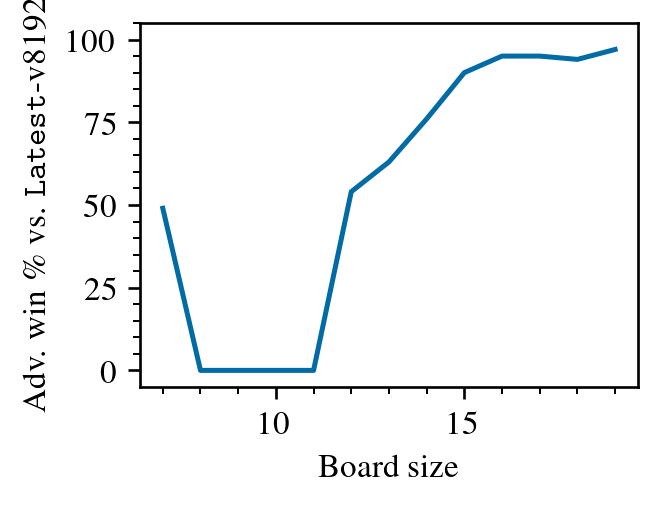

In [18]:
fig, _ = plot_win_rate_by_board_size(df, r"$\texttt{Latest}$-v8192")
fig.savefig("win-rate-vs-board-size.pgf", backend="pgf")